In [37]:
import pandas as pd
import numpy as np
import perfplot

In [38]:
def _setup(n):
    
    df = pd.DataFrame({
        "A": np.random.rand(n),
        "B": "first_last",
    })

    return df

In [39]:
df = _setup(5)
df

,A,B
0,0.500189,first_last
1,0.721816,first_last
2,0.389778,first_last
3,0.941575,first_last
4,0.136280,first_last


In [40]:
df['B'].str.split("_", expand=True)

,0,1
0,first,last
1,first,last
2,first,last
3,first,last
4,first,last


In [41]:
df['B'].str.split(r"_")

0    [first, last]
1    [first, last]
2    [first, last]
3    [first, last]
4    [first, last]
Name: B, dtype: object

In [42]:
 df['B'].apply(lambda x: pd.Series(str(x).split("_")))

,0,1
0,first,last
1,first,last
2,first,last
3,first,last
4,first,last


Output()

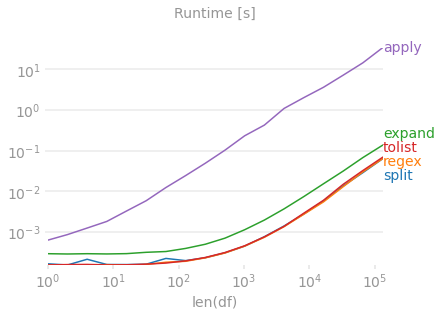

In [43]:
def str_split(df):
    df['B'].str.split("_")

def str_split_regex(df):
    df['B'].str.split(r"_")

def str_split_expand(df):
    df['B'].str.split(expand=True)

def str_split_tolist(df):
    df['B'].str.split("_").tolist()

def apply_str_split(df):
    df['B'].apply(lambda x: pd.Series(str(x).split("_")))


perfplot.show(
    setup=_setup,
    kernels=[
        lambda df: str_split(df),
        lambda df: str_split_regex(df),
        lambda df: str_split_expand(df),
        lambda df: str_split_tolist(df),
        lambda df: apply_str_split(df),
   ],
    labels=["split", "regex", "expand", "tolist", "apply"],
    n_range=[2 ** k for k in range(18)],
    xlabel="len(df)",
    equality_check=None,
)
